# Ford Go Bike **2019** Dataset Wrangling and visualisation 
> Authored by: **Abhishek Pandey** [LinkedIn](https://www.linkedin.com/in/abhishekpandeyit/) | [Twitter](https://twitter.com/PandeyJii_)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
>
> [**Bay Wheels**](https://en.wikipedia.org/wiki/Bay_Wheels#:~:text=Bay%20Wheels%20is%20a%20regional,Area%20Air%20Quality%20Management%20District.) is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In [1]:
"""
Importing all the required python libraries for wrangling process
"""
import numpy as np #For numerical 
import pandas as pd
import matplotlib.pyplot as plt #For plotting graphs
import seaborn as sns
import os
import glob
%matplotlib inline

## Data Gathering

In [2]:
"""Appending all datasets together to intiate the process of wrangling"""

folder_name = 'Datasets'
path_to_save = "F:/Github_repo/BayWheelsRideDataExploration/final_dataset_2019.csv"

def append():
    frames = [pd.read_csv(D) for D in glob.glob(os.path.join(folder_name, '*.csv'))]
    data_concat = pd.concat(frames, ignore_index=True) #Concatenating all the csv files using pandas concat function.
    data_concat.to_csv(path_to_save, index=False) #Saving the concatenated dataset to a single file for further exploraton.
    data_concat.shape

append()    

In [3]:
df = pd.read_csv('F:/Github_repo/BayWheelsRideDataExploration/final_dataset_2019.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [4]:
'''Defining function to do some common exploration'''
dataframe = df
def explore(mode):
    if mode == "size":
        print(f"Rows ={dataframe.shape[0]} and Columns={dataframe.shape[1]} ")
    if mode == "info":
        print("Column-Datatype Information\n")
        dataframe.info()
    if mode == "desc":
        print("Common Description\n")
        dataframe.describe()
    if mode == "null":
        print("Columns with Null/NAN Value\n")
        return dataframe.isnull().sum()
    if mode== "dup":
        print(f"No of Duplicate values = {dataframe.duplicated().sum()}")
    

In [5]:
explore("size")

Rows =2506983 and Columns=15 


In [6]:
explore('info')

Column-Datatype Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [7]:
explore("null")

Columns with Null/NAN Value



duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [8]:
explore("dup")

No of Duplicate values = 0


### Finding Value counts of the possible columns in our Data Set

In [9]:
columns=["user_type", "bike_share_for_all_trip"]
for col in columns:
    print(f"Value counts for {col}")
    print(df[col].value_counts())
    print("\n\n")

Value counts for user_type
Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64



Value counts for bike_share_for_all_trip
No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64





**Finally our process of Data Gathering completes here and I reach on the following conclusions after exploring our dataset at the initial stage:**
> - The size of this dataset is Rows =2506983 and Columns=15 
> - This dataset do not have any duplicate value but there are many null values present in this dataset.
> - The attributes or columns in this Dataset have incorrect datatypes.

To solve these issue I'll further explore this dataset in the Data Cleaning Process Next to this part.

## Data Cleaning
> Cleaning this dataset might affect our original dataset, so to reduce the dataloss I am creating another copy of our dataframe and will work further on it.

In [10]:
#Creating a copy of our dataframe
df_new=df

### Fixing the issue of in correct datatypes in our dataframe `df_new`

In [11]:
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')

df_new['user_type'] = df_new['user_type'].astype('category')


df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2506983 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2506983 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  object        
 12  

In [12]:
#Checking changes in dataframe
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


### Here I found that another issue, so to solve that issue adding new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month.

In [13]:
df_new['duration_minute'] = df_new['duration_sec']/60

df_new['start_date'] = df_new.start_time.dt.strftime('%Y-%m-%d')
df_new['start_hourofday'] = df_new.start_time.dt.strftime('%H')
df_new['start_dayofweek'] = df_new.start_time.dt.strftime('%A')
df_new['start_month'] = df_new.start_time.dt.strftime('%B')

df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,1347.083333,2019-01-31,17,Thursday,January
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098.333333,2019-01-31,20,Thursday,January
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,1043.883333,2019-01-31,18,Thursday,January
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744.666667,2019-01-31,19,Thursday,January
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011.816667,2019-01-31,14,Thursday,January


## Dataset Exploration and visulisation

### Univariate Exploration

> I am exploring here the trips distribution over hour-of-day, day-of-week and month using a series of plots.

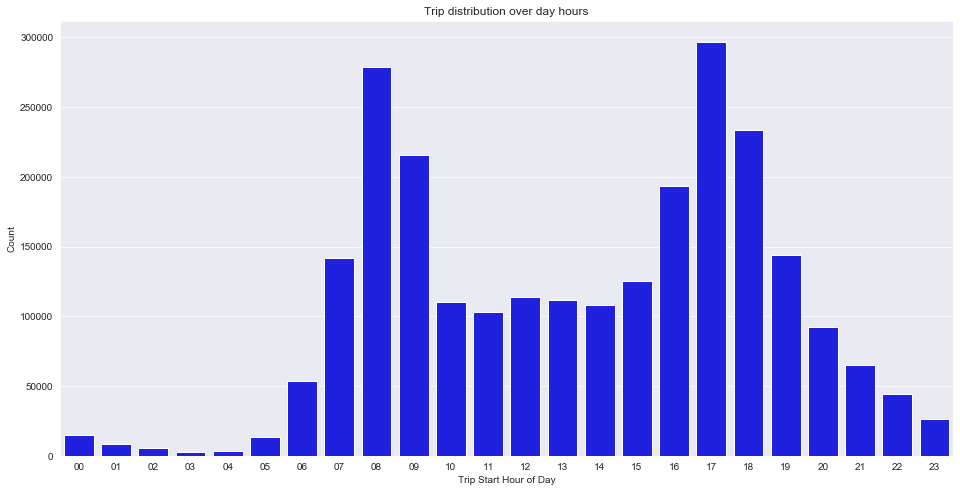

In [14]:
plt.rcParams['figure.figsize'] = 16, 8
base_color = sns.color_palette('colorblind')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_new, x='start_hourofday', color='blue');
plt.title("Trip distribution over day hours")
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

### Here I Noticed a more issue regarding the datatypes of `start_dayofweek` so casting it to appropriate datatype

In [15]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_new['start_dayofweek'] = df_new['start_dayofweek'].astype(weekdaycat)

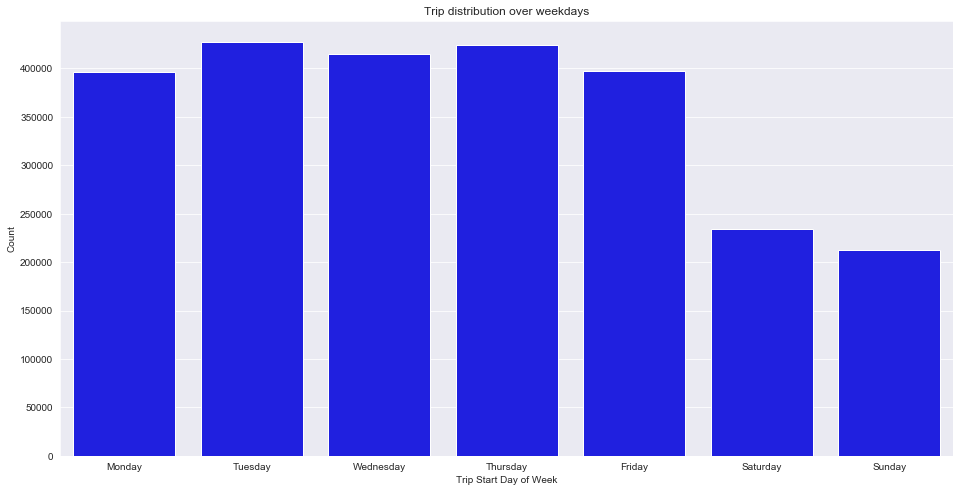

In [16]:
#Ploting graph

sns.countplot(data=df_new, x='start_dayofweek', color="blue");
plt.title("Trip distribution over weekdays")
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

### To plot a distribution graph over months casting `start_month` to categorical data type.

In [17]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df_new['start_month'] = df_new['start_month'].astype(monthcat)

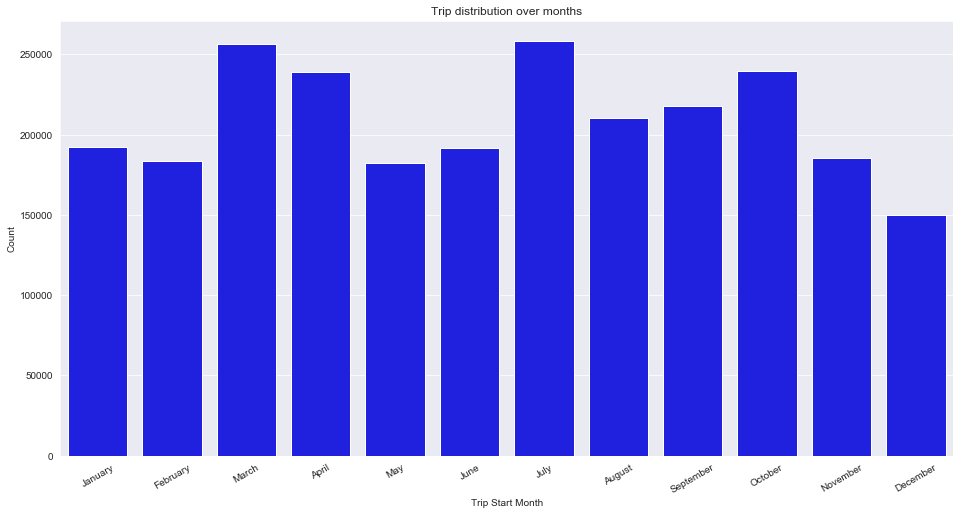

In [18]:
#Ploting distribution
sns.countplot(data=df_new, x='start_month', color= "blue");
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');
plt.title("Trip distribution over months");

### Conclusion from above 3 Graphs:
> - The trip distribution over day hours peaks around two timeframes, **8 AM-9 AM and 5 PM-6 PM**, during typical rush hours.
> - While focusing on the trip distribution over day of week plot, the majority of rides happened on **working days (Mon-Fri).**
> - Deeply analysing the 3rd graph i.e. trip distribution over months I found that the trip distribution is low during two periods, **November to February (Extreme Winter) and May-June(Extreme Summer).**

So finally I can conclude that the peoples opting for bikes, majority of them are **working professionals** because first two graphs show a standard timing of 8-9 AM and 5-6 PM and working days, which mostly prefered for working professionals.
The Third graphs shows a trend that during extreme weather condition either winter or Summer, riders choose the alternatives of the bikes for their commuting purposes.

### Exploring dataset further for other fators can be used for analysis.

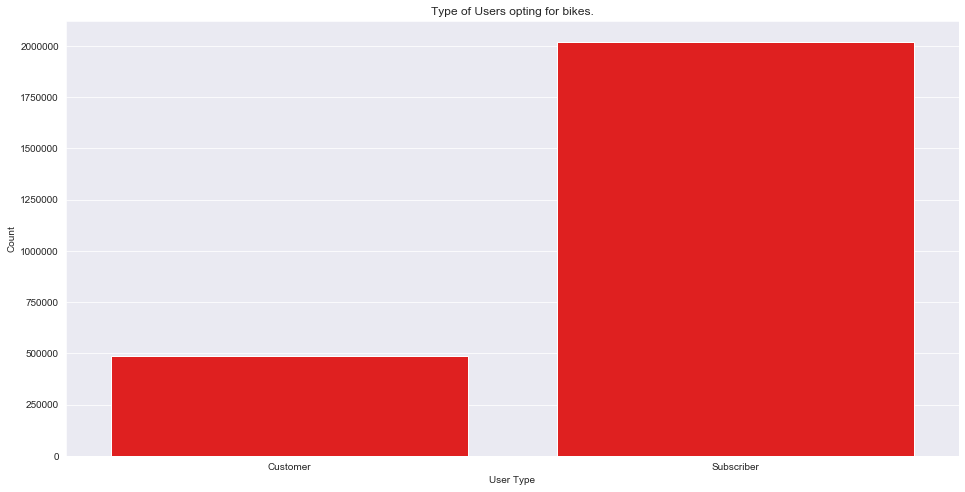

In [19]:
sns.countplot(data=df_new, x='user_type', color= 'red');
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title("Type of Users opting for bikes.");

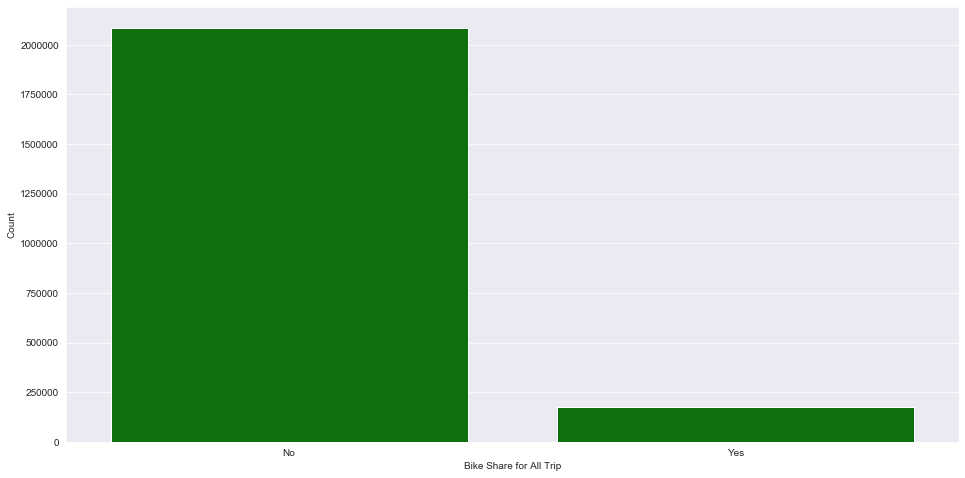

In [20]:
sns.countplot(data=df_new, x='bike_share_for_all_trip', color='green');
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

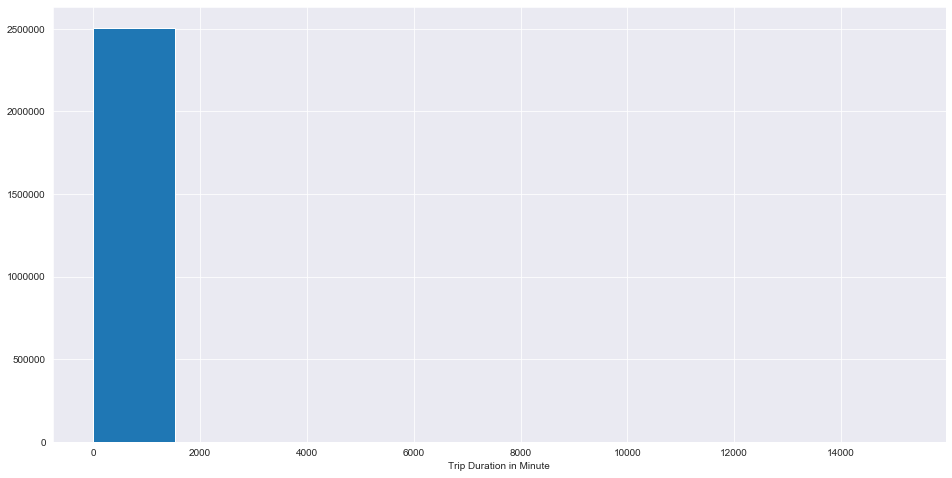

In [21]:
plt.hist(data=df_new, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.   

In [22]:
df_new['duration_minute'].describe(percentiles=[.99])

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
50%      9.516667e+00
99%      6.876667e+01
max      1.520183e+04
Name: duration_minute, dtype: float64

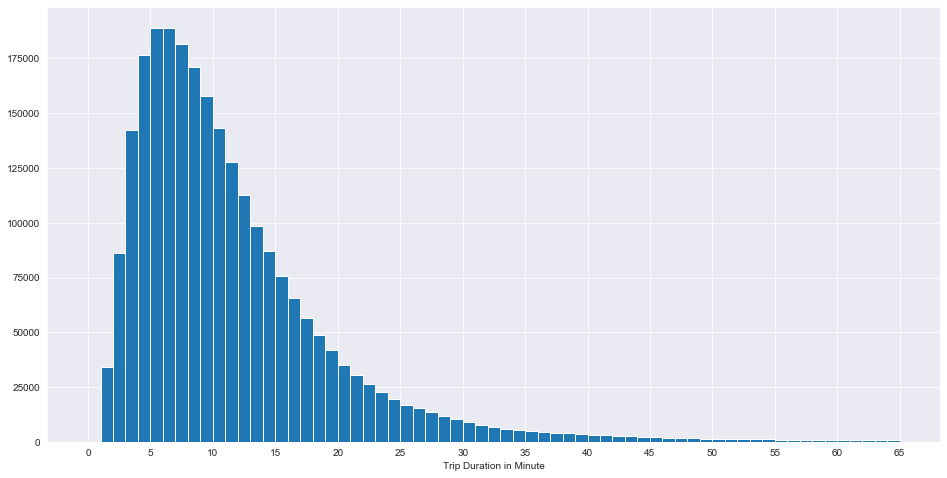

In [23]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df_new, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [24]:
# issue 8: filter out outlier trip records where the duration was very long

df_new = df_new.query('duration_minute <= 66')
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480401 entries, 6 to 2506981
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2480401 non-null  int64         
 1   start_time               2480401 non-null  datetime64[ns]
 2   end_time                 2480401 non-null  datetime64[ns]
 3   start_station_id         2480401 non-null  object        
 4   start_station_name       2401440 non-null  object        
 5   start_station_latitude   2480401 non-null  float64       
 6   start_station_longitude  2480401 non-null  float64       
 7   end_station_id           2480401 non-null  object        
 8   end_station_name         2399384 non-null  object        
 9   end_station_latitude     2480401 non-null  float64       
 10  end_station_longitude    2480401 non-null  float64       
 11  bike_id                  2480401 non-null  object        
 12  

In [25]:
"""
Saving this cleaned dataset into a new file named as cleaned_dataset_2019
"""

df_new.to_csv("F:/Github_repo/BayWheelsRideDataExploration/cleaned_dataset_2019.csv", index=False)

## Bivariate Exploration :: How the trip duration distribution related with user_type?

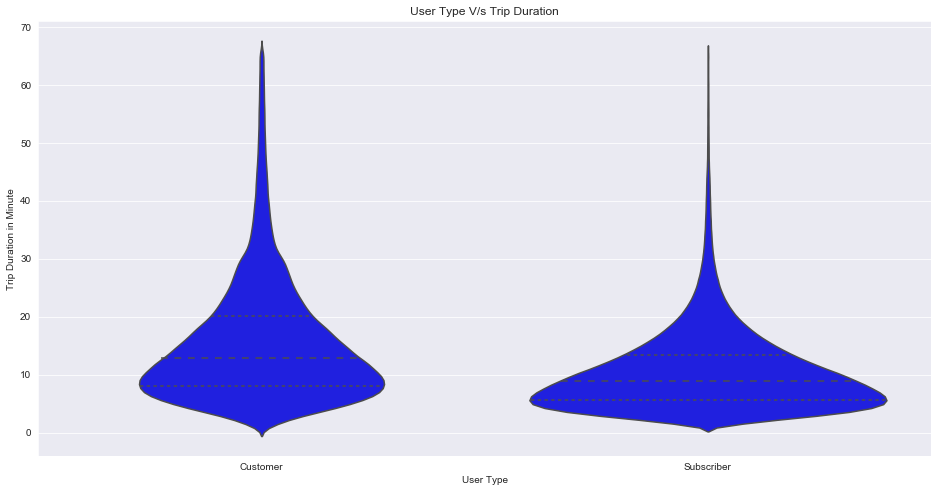

In [26]:
sns.violinplot(data=df_new, x='user_type', y='duration_minute', color= "blue", inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title("User Type V/s Trip Duration");

The above distribution for Subscriber type user shows much narrower distribution than the usual customers. Here we can say that the subscriber type user have much specific reason for taking a bike trip. Now exploring further for detailed analysis.

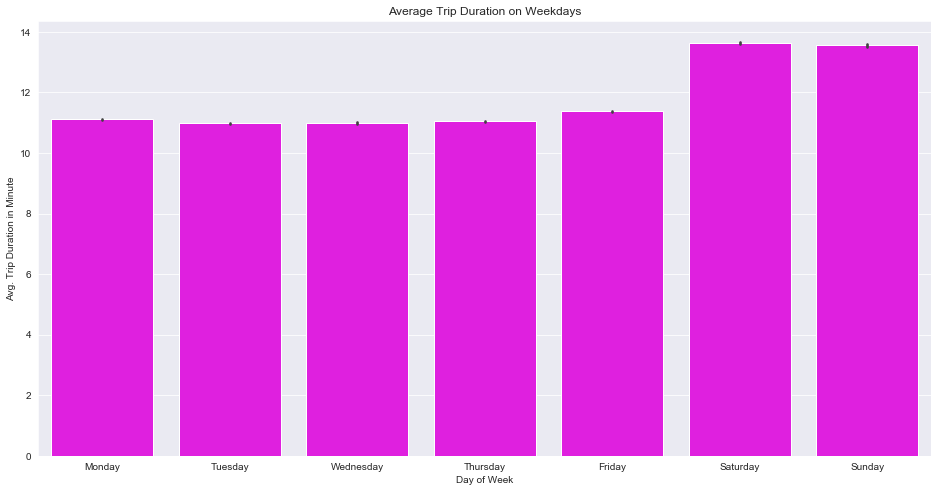

In [27]:
sns.barplot(data=df_new, x='start_dayofweek', y='duration_minute', color= "magenta");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title("Average Trip Duration on Weekdays");

The graph gives a clear visualisation that ride duration on weekends are much longer than workdays. It indicates a stable and efficient usage of the sharing system on work days, while more casual flexible use on weekends. 

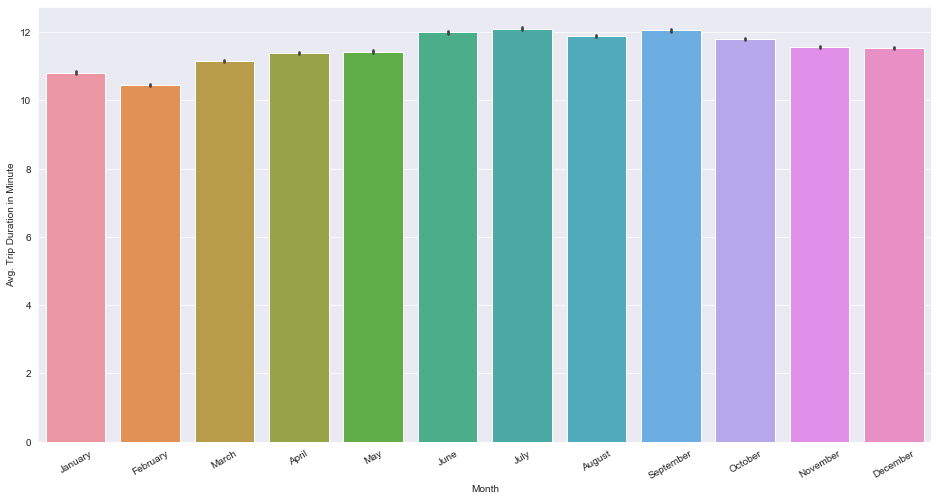

In [28]:
sns.barplot(data=df_new, x='start_month', y='duration_minute');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Since the month of March, the average usage time duration shows an significant increasing trend almost all the way til spetember. The average longest trips happened during the summer months, around June, July and September, which due to the weather condition.

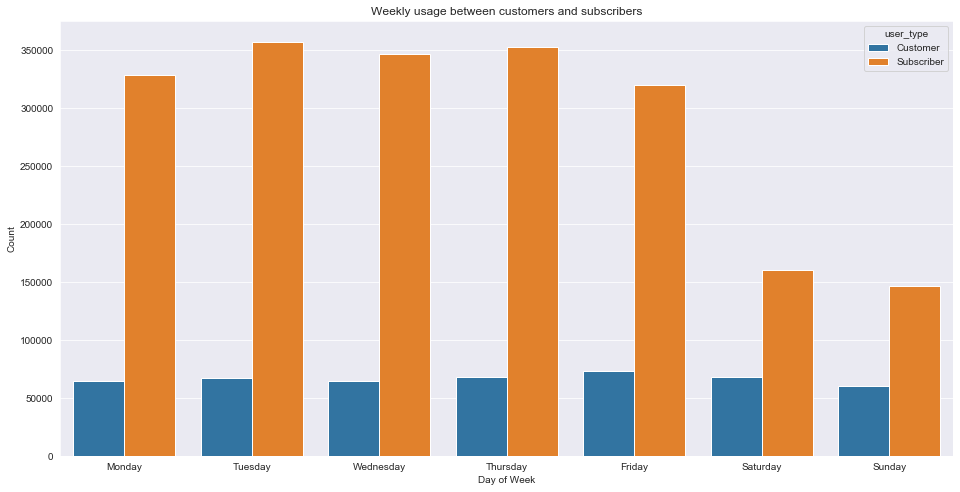

In [29]:
sns.countplot(data=df_new, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title("Weekly usage between customers and subscribers");

The number of subscribers are much larger than customers but sgnificant decrease in ride trip during weekends clearly state that the subscribers are majorly working professionals and using this ride for their office commute. On the other hand the no. customers are nearly same on all the weekdays which do not showing any specific pattern but we can say that these rides taken by customers are just for touring and leasiure purpose.

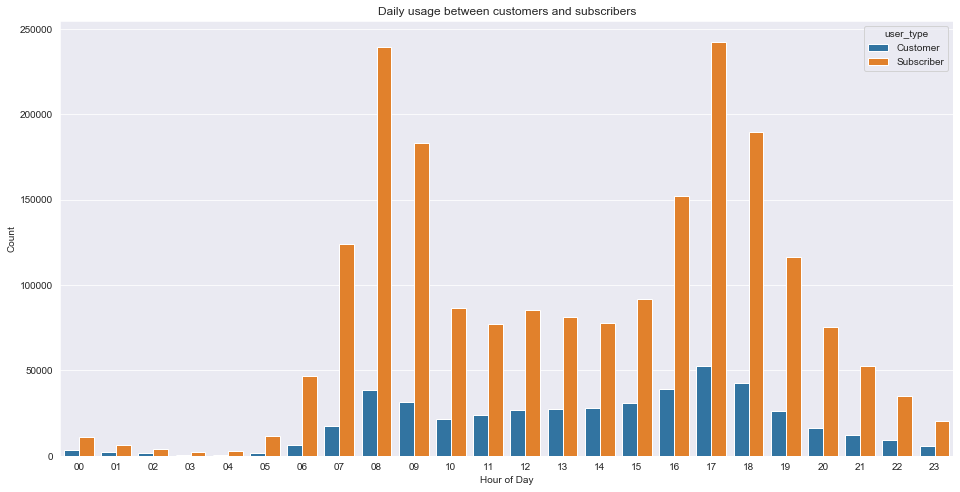

In [30]:
sns.countplot(data=df_new, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('Daily usage between customers and subscribers');

Intrestingly this graph shows a similar pattern between subscribers and customers. As far above visualisation shows that subscribers can be a majority of working professional so that graph shows a peak during 8-9 AM and 5-6 PM but if customers are also showing the same pattern then the reason can be because of safety issue.

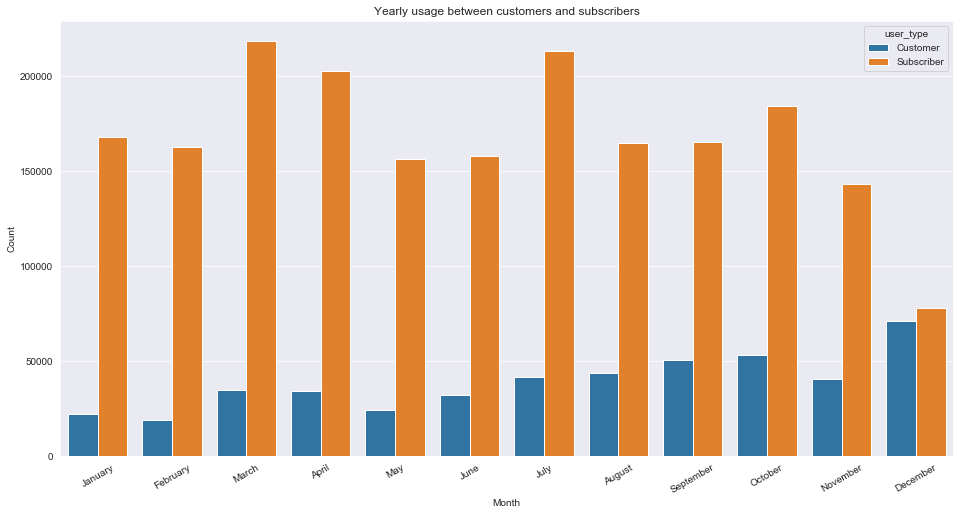

In [31]:
sns.countplot(data=df_new, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');
plt.title('Yearly usage between customers and subscribers');

This graph shows an intresting trend between user types. Subscribers taken this trip least in the month of **December** whereas usual customers shows a peak of usage in the month of december.
Subscribers bar is quite high in March, April, July and october months whereas as the winter near to come usual customers takes more ride and peak rides in December. 
This clearly depicts that subscribers are taking this ride due to ease in commuting to office while usual customers taking this ride for touring and enjoying weather.

## Multivariate Exploration :: Variation in trip duration in weekdays between customers and subscribers?

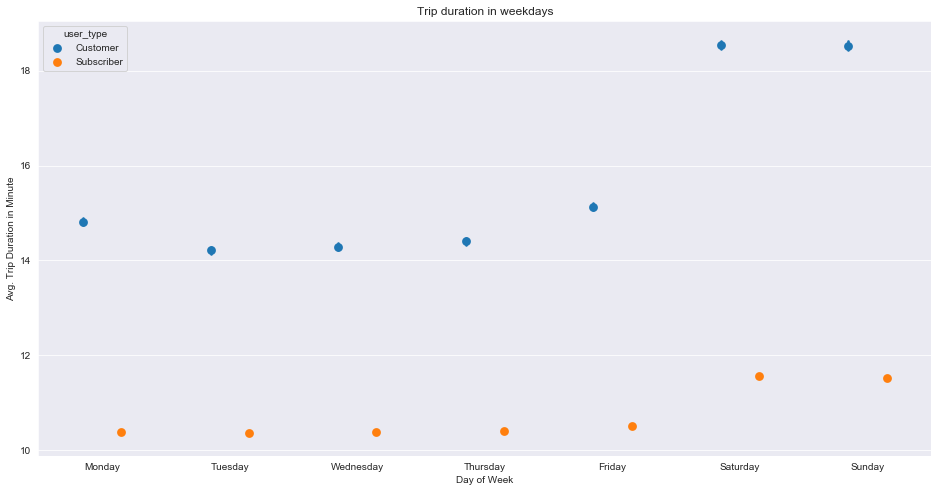

In [32]:
sns.pointplot(data=df_new, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Trip duration in weekdays');

It's clearly visible from the above plot that customers ride much longer trips than subscribers on each day of the week. Both user_types have an increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. 

Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.     

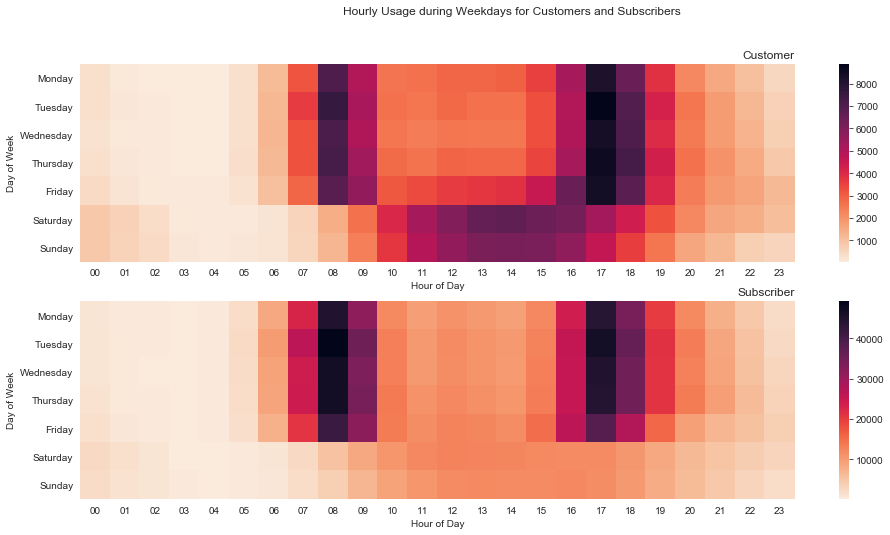

In [33]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sns.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern of the two type of users. Subscribers use the system heavily on work days i.e. Monday- Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 5-6pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 5pm Monday to Friday. 